# Website A/B Testing - Lab

## Introduction

In this lab, you'll get another chance to practice your skills at conducting a full A/B test analysis. It will also be a chance to practice your data exploration and processing skills! The scenario you'll be investigating is data collected from the homepage of a music app page for audacity.

## Objectives

You will be able to:
* Analyze the data from a website A/B test to draw relevant conclusions
* Explore and analyze web action data

## Exploratory Analysis

Start by loading in the dataset stored in the file 'homepage_actions.csv'. Then conduct an exploratory analysis to get familiar with the data.

> Hints:
    * Start investigating the id column:
        * How many viewers also clicked?
        * Are there any anomalies with the data; did anyone click who didn't view?
        * Is there any overlap between the control and experiment groups? 
            * If so, how do you plan to account for this in your experimental design?

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('homepage_actions.csv')
data.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


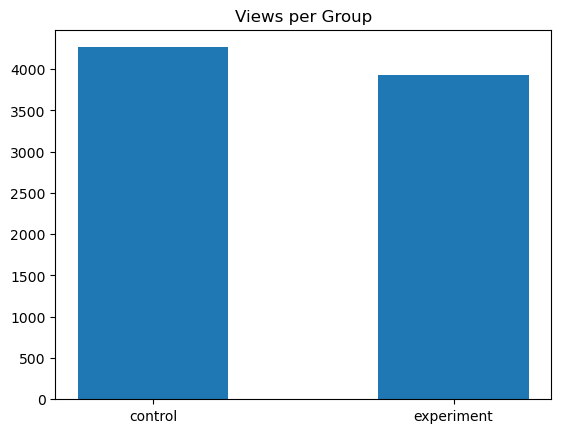

In [24]:
control = data[data['group'] == 'control']
experiment = data[data['group'] == 'experiment']

control_view = control[control['action'] == 'view']
control_click = control[control['action'] == 'click']

experiment_view = experiment[experiment['action'] == 'view']
experiment_click = experiment[experiment['action'] == 'click']


plt.bar([1,2],[len(control['action']), len(experiment['action'])], width= .5, tick_label= ['control', 'experiment'])
plt.title("Views per Group");

Text(0.5, 1.0, 'Control vs Experiment Clicks')

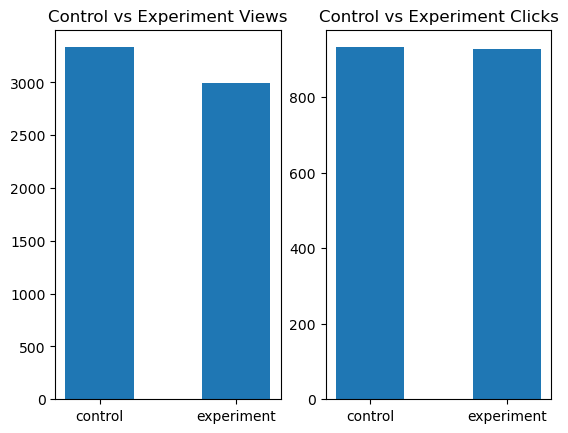

In [26]:
fig, ax = plt.subplots(1, 2)

ax[0].bar([1,2],[len(control_view['action']), len(experiment_view['action'])], width= .5, tick_label= ['control', 'experiment'])
ax[0].set_title('Control vs Experiment Views')
ax[1].bar([1,2],[len(control_click['action']), len(experiment_click['action'])], width= .5, tick_label= ['control', 'experiment'])
ax[1].set_title('Control vs Experiment Clicks')

## Conduct a Statistical Test

Conduct a statistical test to determine whether the experimental homepage was more effective than that of the control group.

In [30]:
contigency_table = pd.crosstab(data['group'], data['action'])
stats.chi2_contingency(contigency_table)

Chi2ContingencyResult(statistic=3.636160051233291, pvalue=0.056537191086915774, dof=1, expected_freq=array([[ 968.61748901, 3295.38251099],
       [ 891.38251099, 3032.61748901]]))

## Verifying Results

One sensible formulation of the data to answer the hypothesis test above would be to create a binary variable representing each individual in the experiment and control group. This binary variable would represent whether or not that individual clicked on the homepage; 1 for they did and 0 if they did not. 

The variance for the number of successes in a sample of a binomial variable with n observations is given by:

## $n\bullet p (1-p)$

Given this, perform 3 steps to verify the results of your statistical test:
1. Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 
2. Calculate the number of standard deviations that the actual number of clicks was from this estimate. 
3. Finally, calculate a p-value using the normal distribution based on this z-score.

### Step 1:
Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 

In [52]:
expected_clicks = len(experiment)*.5

In [63]:
print(expected_clicks)
len(experiment_click)

1962.0


928

### Step 2:
Calculate the number of standard deviations that the actual number of clicks was from this estimate.

In [55]:
p = len(experiment_click)/len(experiment)
variance = len(experiment) * p * (1 - p)
sd = variance**.5

z_score = (len(experiment_click) - expected_clicks) / sd
z_score

-38.84544898464023

### Step 3: 
Finally, calculate a p-value using the normal distribution based on this z-score.

In [61]:
1 - stats.norm.cdf(z_score)

1.0

### Analysis:

Does this result roughly match that of the previous statistical test?

> Comment: **Your analysis here**

## Summary

In this lab, you continued to get more practice designing and conducting AB tests. This required additional work preprocessing and formulating the initial problem in a suitable manner. Additionally, you also saw how to verify results, strengthening your knowledge of binomial variables, and reviewing initial statistical concepts of the central limit theorem, standard deviation, z-scores, and their accompanying p-values.